In [121]:
! pip install pandas
! pip install numpy
! pip install tqdm
! pip install xlsxwriter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 KB 630.8 kB/s eta 0:00:00m eta 0:00:010:00:01


In [27]:
from tqdm import tqdm_notebook
import numpy  as np
import pandas as pd
import os
import json

In [3]:
def print_metadata(item):
    print("Type  : ",type(item))
    print("Shape : ",item.shape)
    print(item)

In [4]:
my_numpy_array = np.random.rand(3)
print_metadata(my_numpy_array)

Type  :  <class 'numpy.ndarray'>
Shape :  (3,)
[0.96164098 0.28638115 0.17305335]


In [5]:
## Series Cant have more than 1 column
my_series = pd.Series(my_numpy_array)
print_metadata(my_series)

Type  :  <class 'pandas.core.series.Series'>
Shape :  (3,)
0    0.961641
1    0.286381
2    0.173053
dtype: float64


In [6]:
## Series data can have only one column
## it can have multiple rows but only 1 column
my_series = pd.Series(my_numpy_array,index=['First','Second','Third'])
print_metadata(my_series)

Type  :  <class 'pandas.core.series.Series'>
Shape :  (3,)
First     0.961641
Second    0.286381
Third     0.173053
dtype: float64


In [7]:
print(my_series['First'])
print(my_series['Second'])
print(my_series['Third'])

0.9616409830436049
0.2863811490407365
0.17305335445661307


In [8]:
array_2d = np.random.rand(3,2)
print_metadata(array_2d)

Type  :  <class 'numpy.ndarray'>
Shape :  (3, 2)
[[0.23173062 0.18861505]
 [0.61760533 0.86795725]
 [0.52006516 0.75855828]]


In [9]:
df = pd.DataFrame(array_2d)
df

,0,1
0,0.231731,0.188615
1,0.617605,0.867957
2,0.520065,0.758558


In [10]:
## getting data from tje first row and second column
## in pandas data frame first is column and second is row
print_metadata(df[1][0])

Type  :  <class 'numpy.float64'>
Shape :  ()
0.18861505491032293


In [11]:
## but in numpy the index is reverse, first row second column
print_metadata(array_2d[0][1])

Type  :  <class 'numpy.float64'>
Shape :  ()
0.18861505491032293


In [12]:
CSV_PATH = os.path.join('..','demos','collection-master','artwork_data.csv')
print(CSV_PATH)

../demos/collection-master/artwork_data.csv


In [13]:
df = pd.read_csv(CSV_PATH,nrows=5,index_col='id',usecols=['id','artist'])
df.head()

,artist
id,
1035,"Blake, Robert"
1036,"Blake, Robert"
1037,"Blake, Robert"
1038,"Blake, Robert"
1039,"Blake, William"


In [14]:
df = pd.read_csv(CSV_PATH,index_col='id')
print(df.columns)

Index(['accession_number', 'artist', 'artistRole', 'artistId', 'title',
       'dateText', 'medium', 'creditLine', 'year', 'acquisitionYear',
       'dimensions', 'width', 'height', 'depth', 'units', 'inscription',
       'thumbnailCopyright', 'thumbnailUrl', 'url'],
      dtype='object')


/tmp/ipykernel_21101/899087641.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH,index_col='id')


In [15]:
COLS_TO_USE = ['id','artist','title','medium','year','acquisitionYear','height','width','units']

In [16]:
df = pd.read_csv(CSV_PATH,index_col='id',usecols=COLS_TO_USE)

/tmp/ipykernel_21101/1396096140.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(CSV_PATH,index_col='id',usecols=COLS_TO_USE)


In [17]:
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm


In [18]:
OUTPUT_FILE = os.path.join('../','work','data.pickle')

In [19]:
## export the data
df.to_pickle(OUTPUT_FILE)

In [20]:
!ls

data.pickle  PandasFundamentals.ipynb


In [21]:
## we create a same dataframe from jason file
## json file is in a folder and every row will be a separate json fiile
## first write a method  to extract single file

In [22]:
def read_json(file_path,key_to_use):
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
    for field in key_to_use:
        print(content[field])

In [23]:
COLS_TO_USE_JSON = ['id','all_artists','title','medium','dateText','acquisitionYear','height','width','units']
read_json("../demos/collection-master/artworks/a/000/a00001-1035.json",COLS_TO_USE_JSON)

1035
Robert Blake
A Figure Bowing before a Seated Old Man with his Arm Outstretched in Benediction. Verso: Indecipherable Sketch
Watercolour, ink, chalk and graphite on paper. Verso: graphite on paper
date not known
1922
419
394
mm


In [24]:
def read_json_v2(file_path,key_to_use):
    ''' This is a method to make a single row '''
    with open(file_path) as artwork_file:
        content = json.load(artwork_file)
    row = []
    for field in key_to_use:
        item = content[field]
        row.append(item)
    return tuple(row)

In [28]:
ROOT_FOLDER = "../demos/collection-master/artworks/"
def read_whole_data(folder_path,key_to_use):
    artwork = []
    success_count = 0
    total_count = 0
    for folder in tqdm_notebook(os.listdir(folder_path),desc='loop1'):
        if os.path.isdir(os.path.join(ROOT_FOLDER,folder)):
            for f1 in os.listdir(os.path.join(ROOT_FOLDER,folder)):
                for file in os.listdir(os.path.join(ROOT_FOLDER,folder,f1)):
                    if file.endswith('json'):
                        total_count+=1
                        try:
                            record = read_json_v2(os.path.join(ROOT_FOLDER,folder,f1,file),key_to_use)
                            success_count+=1
                        except:
                            pass
                        artwork.append(record)
                        
                    break
    print("SUCCESSFUL READ FILES : ",success_count)
    print("TOAL  FILES : ",total_count)
    print("CORRUPTED FILE : ",total_count-success_count)
    d = pd.DataFrame.from_records(artwork,columns=COLS_TO_USE_JSON,index='id')
    return d
                    
                
            

In [31]:
df= read_whole_data(ROOT_FOLDER,COLS_TO_USE_JSON)

/tmp/ipykernel_21101/751737453.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for folder in tqdm_notebook(os.listdir(folder_path),desc='loop1'):


loop1:   0%|          | 0/6 [00:00<?, ?it/s]

SUCCESSFUL READ FILES :  736
TOAL  FILES :  738
CORRUPTED FILE :  2


In [33]:
df.head()

,all_artists,title,medium,dateText,acquisitionYear,height,width,units
id,,,,,,,,
13356,Shmuel Shapiro,Two Lovers,Lithograph on paper,1966–7,1976,448,349,mm
21692,Tony Bevan,Group with Dark Background,Drypoint on paper,1993,1996,193,193,mm
26228,Thomas Ruff,Portrait 1986 (Stoya),"Photograph, colour, on paper",1986,1998,1205,1600,mm
4251,Mary Fedden,Fritillaries,Lithograph on paper,1972,1975,575,778,mm
7887,Ellsworth Kelly,Concorde II (State),Etching and aquatint on paper,1981,1986,284,425,mm


In [ ]:
## task
## we use the pickleddata set
## 1) how many distinct/unique artist in the collection
## 2) how many artworks by Francis Bacon 
## 3) what is the artwork with the biggest dimension

In [35]:
## TASK
## how many unique artist in the collection in the collection

In [36]:
df = pd.read_pickle("./data.pickle")

In [37]:
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm


In [46]:
## Task 1
artist = df['artist']
print("Artist in the database: ",len(artist))
u_artist = pd.unique(artist)
print("Unique artist ",len(u_artist))

Artist in the database:  69201
Unique artist  3336


In [55]:
## Task 2 
## 2) how many artworks by Francis Bacon
occur = df[['artist']].value_counts()
print(occur['Bacon, Francis'])

50


In [59]:
(df['artist'] == 'Bacon, Francis').value_counts()

artist
False    69151
True        50
Name: count, dtype: int64

In [62]:
df.head(10)

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243,335.0,mm
1040,"Blake, William",Ciampolo the Barrator Tormented by the Devils,Line engraving on paper,1826.0,1919.0,240,338.0,mm
1041,"Blake, William",The Baffled Devils Fighting,Line engraving on paper,1826.0,1919.0,242,334.0,mm
1042,"Blake, William",The Six-Footed Serpent Attacking Agnolo Brunel...,Line engraving on paper,1826.0,1919.0,246,340.0,mm
1043,"Blake, William",The Serpent Attacking Buoso Donati,Line engraving on paper,1826.0,1919.0,241,335.0,mm


In [64]:
## Loc and ILoc explained
## the syntax of loc 
# df.loc[row_indexer,column_indexer]
print(df.loc[1035,'artist'])
## it will return the row number 1035 (index value)
## and in the artist column
## so it will just return a cell

Blake, Robert


In [71]:
## another thing we could do with the loc
## in the row indexer we can pass boolean expression
## so the syntax df.loc[boolean, column_indexer]
## it will return alll the row from the colum that is given in the column_indexer
## example
df.loc[df['artist'] == 'Bacon, Francis','artist'].value_counts()
## if we want all the colum we can use the wildcard which is :

artist
Bacon, Francis    50
Name: count, dtype: int64

In [72]:
df.loc[df['artist'] == 'Bacon, Francis',:]


,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
672,"Bacon, Francis",Figure in a Landscape,Oil paint on canvas,1945.0,1950.0,1448,1283,mm
673,"Bacon, Francis",Study of a Dog,Oil paint on canvas,1952.0,1952.0,1981,1372,mm
674,"Bacon, Francis",Three Studies for Figures at the Base of a Cru...,Oil paint on 3 boards,1944.0,1953.0,NaN,NaN,NaN
677,"Bacon, Francis",Study for a Portrait of Van Gogh IV,Oil paint on canvas,1957.0,1958.0,1524,1168,mm
678,"Bacon, Francis",Reclining Woman,Oil paint on canvas,1961.0,1961.0,1988,1416,mm
679,"Bacon, Francis",Seated Figure,Oil paint on canvas,1961.0,1961.0,1651,1422,mm
680,"Bacon, Francis",Study for Portrait on Folding Bed,Oil paint on canvas,1963.0,1963.0,1981,1473,mm
681,"Bacon, Francis",Portrait of Isabel Rawsthorne,Oil paint on canvas,1966.0,1966.0,813,686,mm
682,"Bacon, Francis",Three Figures and Portrait,Oil paint and pastel on canvas,1975.0,1977.0,1981,1473,mm


In [76]:
## 3) what is the artwork with the biggest dimension
## When you set errors='coerce', it means that any data
## that cannot be converted to a numeric type will be  
## replaced with NaN (Not-a-Number) values.

# first convert then into numeric
new_width = pd.to_numeric(df['width'],errors='coerce')
new_height = pd.to_numeric(df['height'],errors='coerce')

In [77]:
## now we replace the height and weight column of the df 
## with this new_height and new_width
# df.loc[:,'height'] means every row in the height column
# df.loc[:,'width'] means every row in the width column
df.loc[:,'height'] = new_height
df.loc[:,'width'] = new_width


In [79]:
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343.0,467.0,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243.0,335.0,mm


In [82]:
df['area'] = df['height']* df['width']  ## find the area

In [83]:
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394.0,419.0,mm,165086.0
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311.0,213.0,mm,66243.0
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785.0,1922.0,343.0,467.0,mm,160181.0
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318.0,394.0,mm,125292.0
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826.0,1919.0,243.0,335.0,mm,81405.0


In [84]:
## now sort the values based on the area and find the largest one
df.sort_values('area',ascending=False)

,artist,title,medium,year,acquisitionYear,width,height,units,area
id,,,,,,,,,
98367,"Therrien, Robert",No Title (Table and Four Chairs),"Aluminium, steel, wood and plastic",2003.0,2008.0,8920.0,14850.0,mm,132462000.0
69085,"Bourgeois, Louise",Maman,Steel and marble,1999,2008.0,8915.0,10236.0,mm,91253940.0
20200,"Long, Richard",Norfolk Flint Circle,Flint,1990.0,1991.0,8000.0,8000.0,mm,64000000.0
82481,"Hiller, Susan",Psi Girls,"Video, 5 projections, colour and sound (stereo)",1999,2007.0,3000.0,20000.0,mm,60000000.0
78661,Gilbert & George,Named,"90 photographs, gelatine silver print with dye...",2001,2004.0,3550.0,15300.0,mm,54315000.0
...,...,...,...,...,...,...,...,...,...
121283,"Rhodes, Lis",Light Music,"Film, 16 mm, 2 projections, black and white, a...",1975,2013.0,NaN,NaN,NaN,NaN
117863,"Andrade, Jonathas de",Tropical Hangover,"151 text panels, typewritten ink on paper, 53 ...",2009,2013.0,NaN,NaN,NaN,NaN
120549,"Oursler, Tony",The Influence Machine,"Video, multiple projections, sound and smoke",2000,2013.0,NaN,NaN,NaN,NaN


In [89]:
## or
print(df['area'].max())

132462000.0


In [93]:
## to get the whole row
row_index = df['area'].idxmax()
print(row_index)

98367


In [94]:
## now we want every column of that row so the method is
row = df.loc[row_index,:]

In [95]:
row

artist                               Therrien, Robert
title                No Title (Table and Four Chairs)
medium             Aluminium, steel, wood and plastic
year                                           2003.0
acquisitionYear                                2008.0
width                                          8920.0
height                                        14850.0
units                                              mm
area                                      132462000.0
Name: 98367, dtype: object

In [98]:
### Task
### find each artist's oldest art 

## solution in order to do that first
## you have to group the art based on the artist
## and then apply the min function based on the acquisitionYear date

## lets take a sample data from the population data
df_small = df.head(100)

In [99]:
## now group it based on the artist
grouped = df_small.groupby('artist')

In [100]:
grouped

In [105]:
## so write th total function
grouped_by_artist = df_small.groupby('artist')
for name,group in grouped_by_artist:
    min_value = group['acquisitionYear'].min()
    print("[*] Name : {} , Year : {}".format(name,min_value))


[*] Name : Blake, Robert , Year : 1922.0
[*] Name : Blake, William , Year : 1919.0
[*] Name : British School 18th century , Year : 1896.0
[*] Name : Burne-Jones, Sir Edward Coley, Bt , Year : 1916.0
[*] Name : Richmond, George , Year : 1922.0


In [106]:
### how to fill null value with most occaring values
### series means just one  column
def fill_values(series):
    value_counted = series.value_counts()
    print(value_counted)
    most_frequent = value_counted.index[0]
    new_series = series.fillna(most_frequent)
    return new_series

In [117]:
df[['width']].isnull().sum()

width    3367
dtype: int64

In [111]:
new_series = fill_values(df['width'])

width
113.0     2096
114.0     1204
155.0      976
112.0      946
118.0      928
          ... 
2597.0       1
1556.0       1
1543.0       1
1428.0       1
2093.0       1
Name: count, Length: 1968, dtype: int64


In [113]:
new_series.isnull().sum()

0

In [123]:

# if you want to make a multiple shhets excel file
# if you want single hen it is just df.to_excel('file.xlsx')

writer = pd.ExcelWriter('multiple_sheets.xlsx',engine='xlsxwriter')
df_small.to_excel(writer,sheet_name='small_sheet')
df.to_excel(writer,sheet_name='big_sheet')
writer.close()

In [124]:
!ls

data.pickle  multiple_sheets.xlsx  PandasFundamentals.ipynb


In [125]:
## exporting in the database
## we need database connenction for that
## lets use sqlite3 and mysql for that
table_name = 'data'
import sqlite3
conn = sqlite3.connect("database.db")
df_small.to_sql(table_name,conn)

100

In [139]:
## task
## group the data based on the acquisitionYEar
grouped = df.groupby("acquisitionYear")

In [140]:
total_count = grouped.size()

/tmp/ipykernel_21101/270777385.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


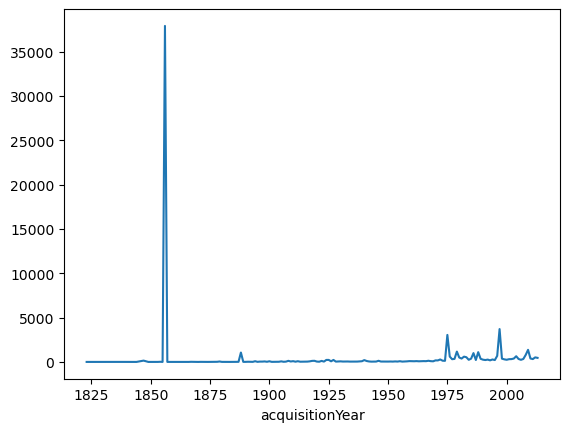

In [145]:
import matplotlib.pyplot as plt
fig = plt.figure()
total_count.plot()
fig.show()


In [146]:
fig.savefig('data.png')

In [147]:
!ls

database.db  data.png		   PandasFundamentals.ipynb
data.pickle  multiple_sheets.xlsx
